# calculate euclidean distance between two cartesian points.

(3,4), (5,12)

In [116]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import *
from qiskit.circuit import *
import numpy as np

anc = QuantumRegister(1)
psi = QuantumRegister(1)
anc1 = QuantumRegister(1)
anc2 = QuantumRegister(1, name="anc")
creg = ClassicalRegister(1)

QC = QuantumCircuit(anc2, anc1, anc, psi , creg)

v1 = np.array([3,4])
v2 = np.array([5,12])

la = np.linalg.norm(v1)
lb = np.linalg.norm(v2)

Z = round(la**2 + lb**2)

QC.barrier()
QC.prepare_state([la/np.sqrt(Z), -lb/np.sqrt(Z)], anc1[0], label="Init state")
QC.barrier()

ugate = QuantumCircuit(1, name="load |b>")
ugate.prepare_state(v2/lb)
ugate = ugate.to_gate().control(1)
QC.h(anc[0])
QC.append(ugate, [anc[0], psi[0]])

QC.x(anc[0])

ugate = QuantumCircuit(1, name="load |a>")
ugate.prepare_state(v1/la)
ugate = ugate.to_gate().control(1)
QC.append(ugate, [anc[0], psi[0]])

QC.x(anc[0])

state = Statevector(QC)
state.draw(output="Latex")

<IPython.core.display.Latex object>

In [117]:
print (Z, la, lb)

194 5.0 13.0


In [118]:
QC.barrier()

QC.h(anc2[0])
QC.cswap(anc2[0], anc[0], anc1[0])
QC.h(anc2[0])

QC.barrier()

state = Statevector(QC)
state.draw(output="Latex")

<IPython.core.display.Latex object>

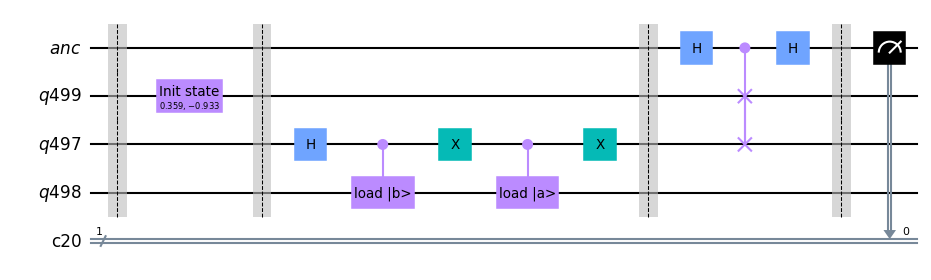

In [119]:
QC.measure(anc2[0], 0)
QC.draw(output="mpl", scale=0.75)

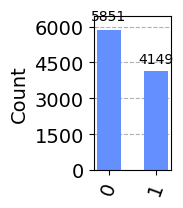

In [120]:
backend = Aer.get_backend("qasm_simulator")
nShots  = 10000
job_sim = backend.run(transpile(QC, backend), shots=nShots)
counts = job_sim.result().get_counts()
plot_histogram(counts, figsize=(1,2))

In [121]:
if '0' in counts:
    b = counts['0']
else:
    b = 0
    
P0 = counts['0']/nShots

dist = np.linalg.norm(v1 - v2)
print('\n DistCalc Distance:',round( np.sqrt(abs(4*Z*P0 - 2*Z)),10), dist)



 DistCalc Distance: 8.1263521952 8.246211251235321
